In [1]:
# Importamos las librerias
import fastf1 as f1
import fastf1.plotting
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Cargamos una carpeta cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [3]:
# Cargamos los datos del BRITISH GRAND PRIX 2024
sesion = f1.get_session(2024, 12, 'FP1')

In [4]:
# Sesion, nombre y fecha de la carrera
print(sesion.name)
print(sesion.event.OfficialEventName)
print(sesion.date)

Practice 1
FORMULA 1 QATAR AIRWAYS BRITISH GRAND PRIX 2024
2024-07-05 11:30:00


In [5]:
# Cargamos la informacion de la carrera
sesion.load()

core           INFO 	Loading data for British Grand Prix - Practice 1 [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 10
core        WARNING 	No lap data for driver 11
core        WARNING 	No lap data for driver 2
core        WARNING 	No lap data for driver 20
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 10)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 11)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 2)
core        WARNING 	Fa

### Comparación vueltas de Colapinto y Albon

#### Vuelta más rapida de ambos

In [ ]:
# Guardamos la vuelta mas rapida de cada piloto
col_lap = sesion.laps.pick_driver('COL').pick_fastest()
alb_lap = sesion.laps.pick_driver('ALB').pick_fastest()

# Telemetría de la vuelta mas rapida de cada piloto
col_tel = col_lap.get_car_data().add_distance()
alb_tel = alb_lap.get_car_data().add_distance()

req            INFO 	Using cached data for driver_info


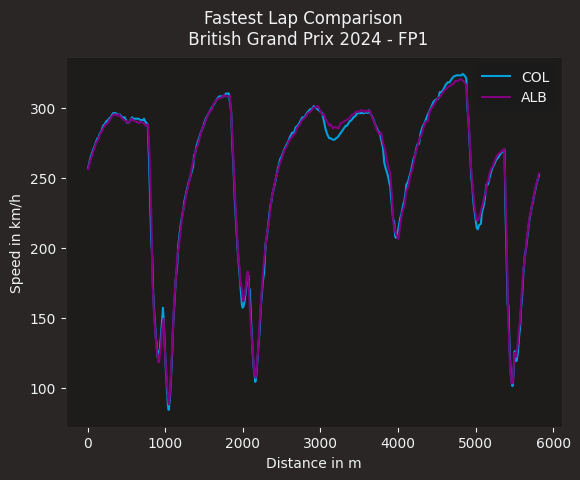

In [7]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')

wil1_color = fastf1.plotting.get_team_color(col_lap['Team'], session=sesion)
wil2_color = 'purple'

fig, ax = plt.subplots()
ax.plot(col_tel['Distance'], col_tel['Speed'], color=wil1_color, label='COL')
ax.plot(alb_tel['Distance'], alb_tel['Speed'], color=wil2_color, label='ALB')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{sesion.event['EventName']} {sesion.event.year} - FP1")

plt.show()

#### Ritmo de Colapinto y Albon

In [10]:
# Seleccionamos a los pilotos
pilotos = [ "ALB",  "COL"]
pilotos_laps = sesion.laps.pick_drivers(pilotos).pick_quicklaps()
pilotos_laps = pilotos_laps.reset_index()

posicines_finales = [sesion.get_driver(i)["Abbreviation"] for i in pilotos]
print(posicines_finales)

['ALB', 'COL']


C:\Users\Laura\AppData\Local\Temp\ipykernel_2936\1073371365.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


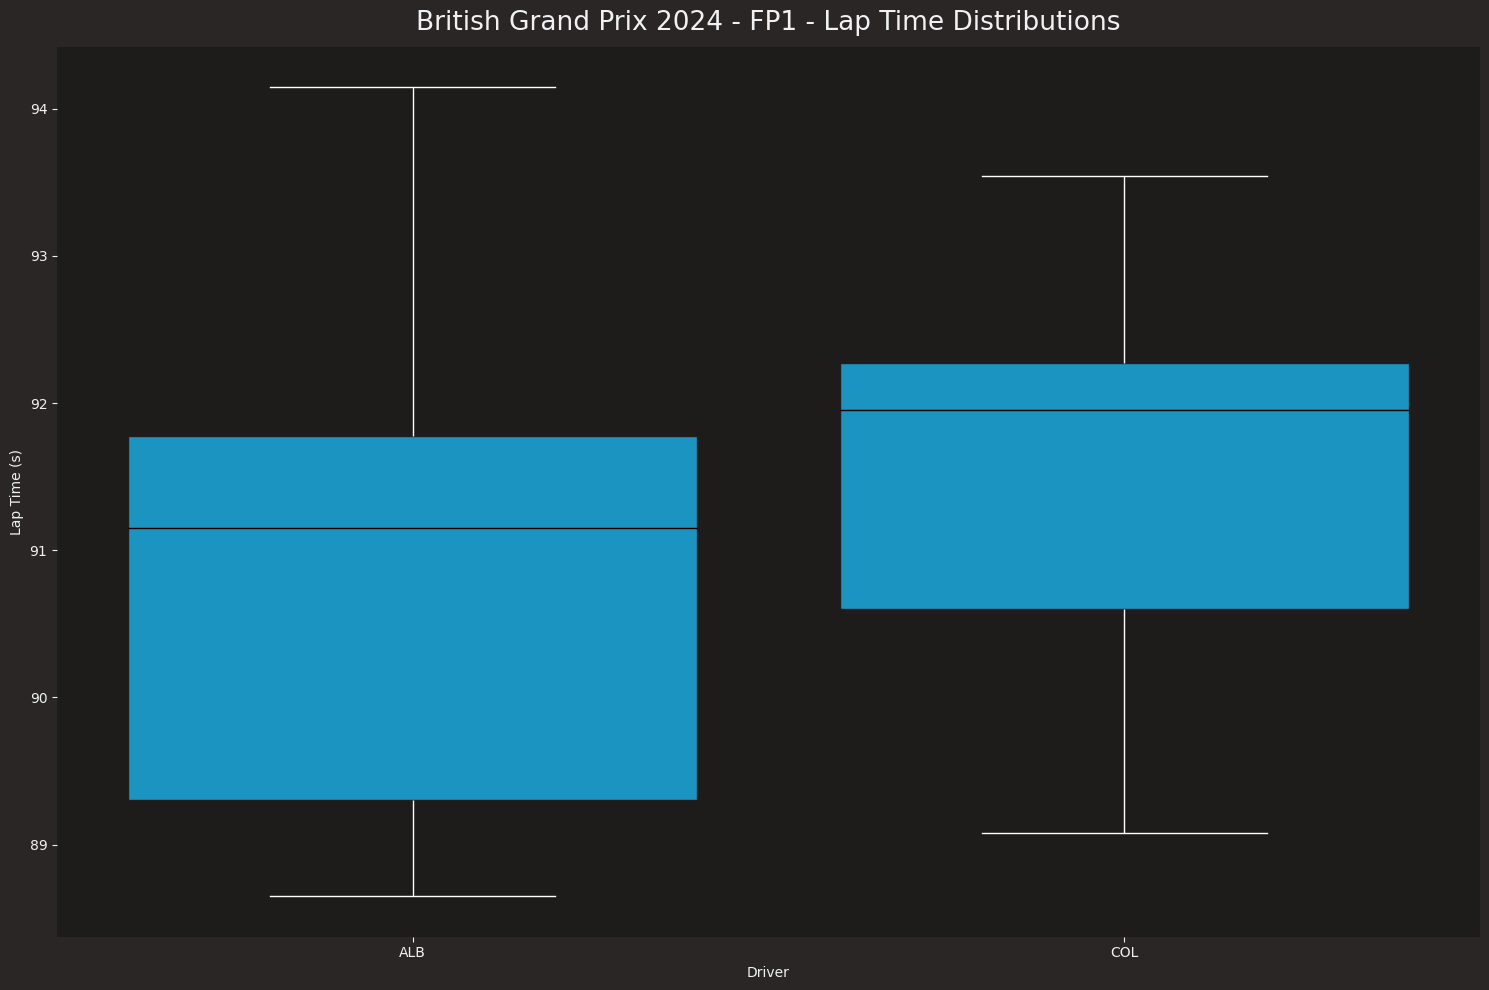

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))

# Convertimos los tiempos de vuelta a segundos
pilotos_laps["LapTime(s)"] = pilotos_laps["LapTime"].dt.total_seconds()

# Boxplot comparativo de ritmo de carrera entre los distintos pilotos
sns.boxplot(
    data=pilotos_laps,
    x="Driver",
    y="LapTime(s)",
    order=posicines_finales,
    palette=fastf1.plotting.get_driver_color_mapping(session=sesion),
    whiskerprops=dict(color="white"),
    medianprops=dict(color="black"),
    capprops=dict(color="white"),
)

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.title(f"{sesion.event['EventName']} {sesion.event.year} - FP1 - Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.grid(visible=False)

plt.tight_layout()
plt.show()

## Tiempos de vuelta de Colapinto

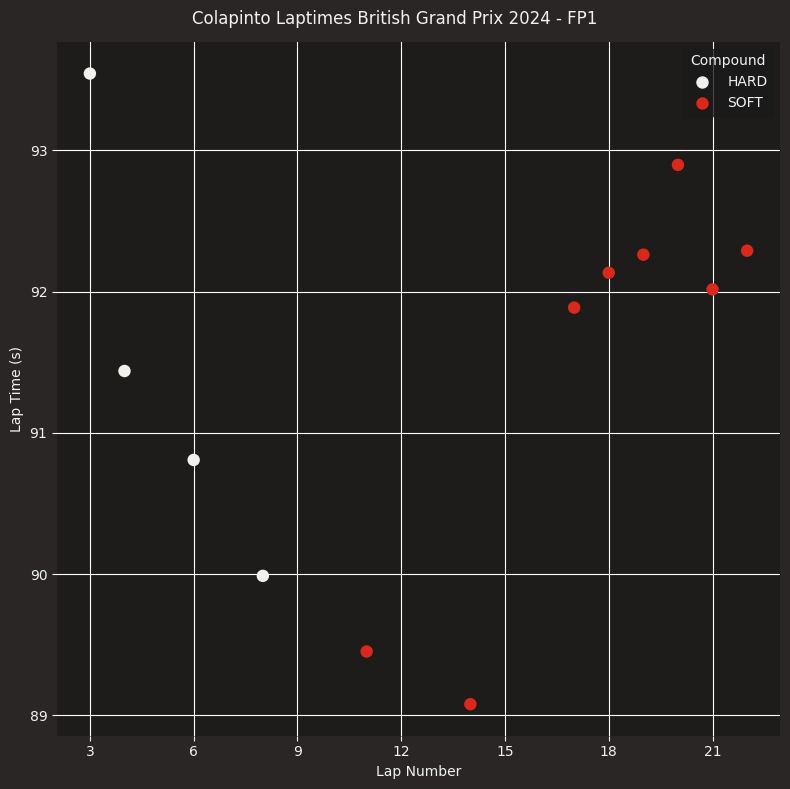

In [36]:
from matplotlib.ticker import MaxNLocator

col_laps = sesion.laps.pick_driver("COL").pick_quicklaps().reset_index()
col_laps["LapTime(s)"] = col_laps["LapTime"].dt.total_seconds()
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=col_laps,
                x="LapNumber",
                y="LapTime(s)",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=sesion),
                s=80,
                linewidth=0,
                legend='auto'
                )

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time (s)")
plt.suptitle(f"Colapinto Laptimes {sesion.event['EventName']} {sesion.event.year} - FP1")
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Diferencia de los Rookies con su compañeros de equipo

In [16]:
# Diferencia entre los pilotos de Williams
col_lap["LapTime"]
alb_lap["LapTime"]
gap_williams = col_lap["LapTime"] - alb_lap["LapTime"]

# Diferencia entre los pilotos de Red Bull
ver_lap = sesion.laps.pick_driver('VER').pick_fastest()
had_lap = sesion.laps.pick_driver('HAD').pick_fastest()
gap_redbull = had_lap["LapTime"] - ver_lap["LapTime"]

# Diferencia entre los pilotos de Haas
hul_lap = sesion.laps.pick_driver('HUL').pick_fastest()
bea_lap = sesion.laps.pick_driver('BEA').pick_fastest()
gap_haas = bea_lap["LapTime"] - hul_lap["LapTime"]

# Diferencia entre los pilotos de Alpine
oco_lap = sesion.laps.pick_driver('OCO').pick_fastest()
doo_lap = sesion.laps.pick_driver('DOO').pick_fastest()
gap_alpine = doo_lap["LapTime"] - oco_lap["LapTime"]

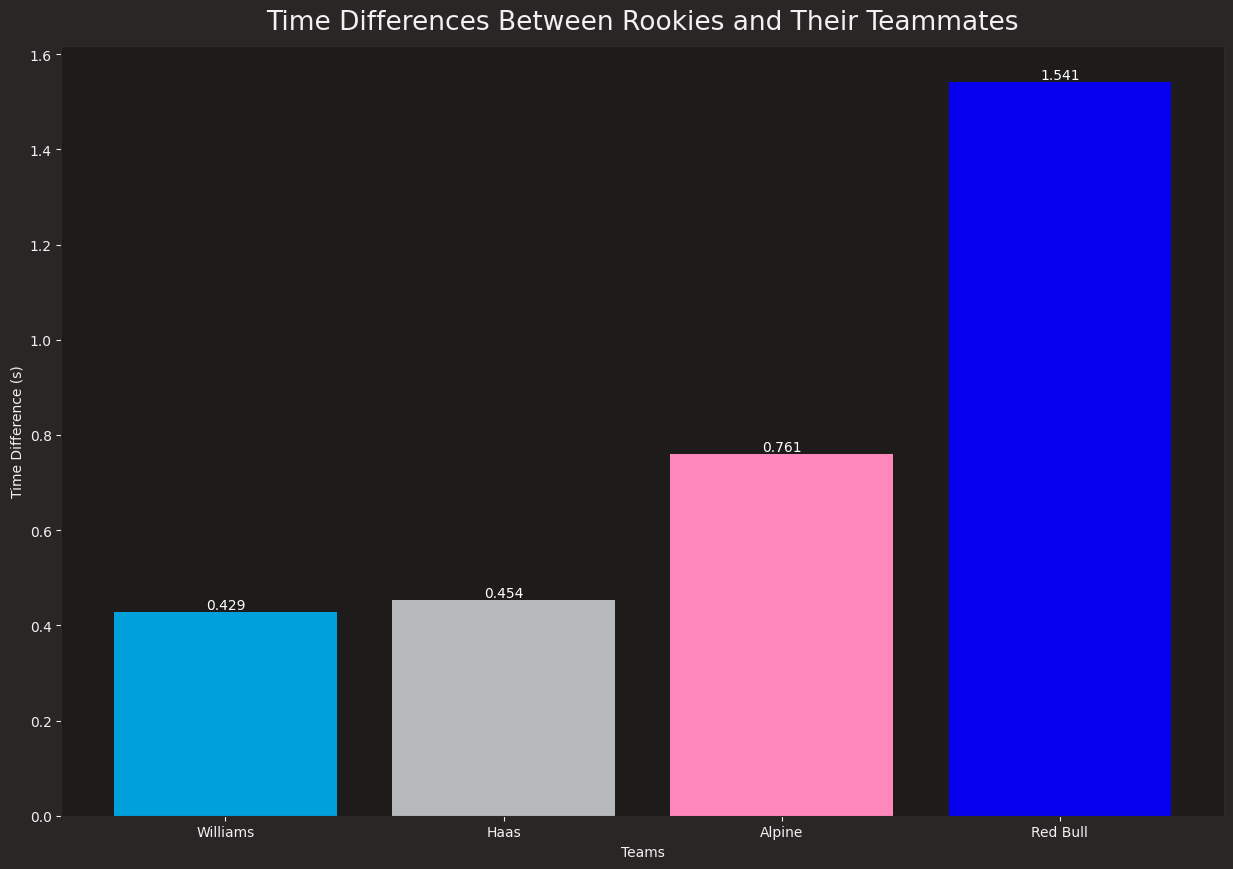

In [24]:
# Grafico de barras de las diferencias entre los pilotos con los Rookies
fig, ax = plt.subplots(figsize=(15, 10))

# Datos para el gráfico
teams = ['Williams', 'Red Bull', 'Haas', 'Alpine']
gaps = [gap_williams.total_seconds(), gap_redbull.total_seconds(), gap_haas.total_seconds(), gap_alpine.total_seconds()]
colors = [wil1_color, fastf1.plotting.get_team_color('Red Bull Racing', session=sesion), fastf1.plotting.get_team_color('Haas F1 Team', session=sesion), fastf1.plotting.get_team_color('Alpine', session=sesion)]

# Ordenamos las diferencias y los equipos
sorted_indices = np.argsort(gaps)
sorted_teams = [teams[i] for i in sorted_indices]
sorted_gaps = [gaps[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]

# Crear el gráfico de barras
bars = ax.bar(sorted_teams, sorted_gaps, color=sorted_colors)

# Añadir las diferencias de tiempo encima de las barras
for bar, gap in zip(bars, sorted_gaps):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{gap:.3f}', ha='center', va='bottom', color='white')

ax.set_xlabel('Teams')
ax.set_ylabel('Time Difference (s)')
plt.title('Time Differences Between Rookies and Their Teammates')
plt.show()